In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

In [22]:
plot_dir = Path("plots")
plot_dir.mkdir(exist_ok=True)

### Visualize predictions on separate subplots

Please put test set predictions and targets in some folder and set it below.

The subplot names are given based on the file names.

In [23]:
pred_dir = Path("..\sindy\compare_models")
pred_files = pred_dir.glob("*.csv")

# Create a dictionary to store the dataframes
pred_dict = {}

for pred_file in pred_files:
    # Read the csv file
    df = pd.read_csv(pred_file)
    # Get the model name
    model_name = pred_file.stem
    # Store the dataframe in the dictionary
    pred_dict[model_name] = df

print(pred_dict.keys())

dict_keys(['cfc_preds', 'cfc_pruned_preds', 'sindy_preds', 'sindy_pruned_preds', 'targets'])


In [24]:
pred_dict["targets"].head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.201739,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.121669,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.026943,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.002191,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000065,0.0,0.0,0.0,0.0,0.0


In [25]:
custom_colors = sns.color_palette("tab10")

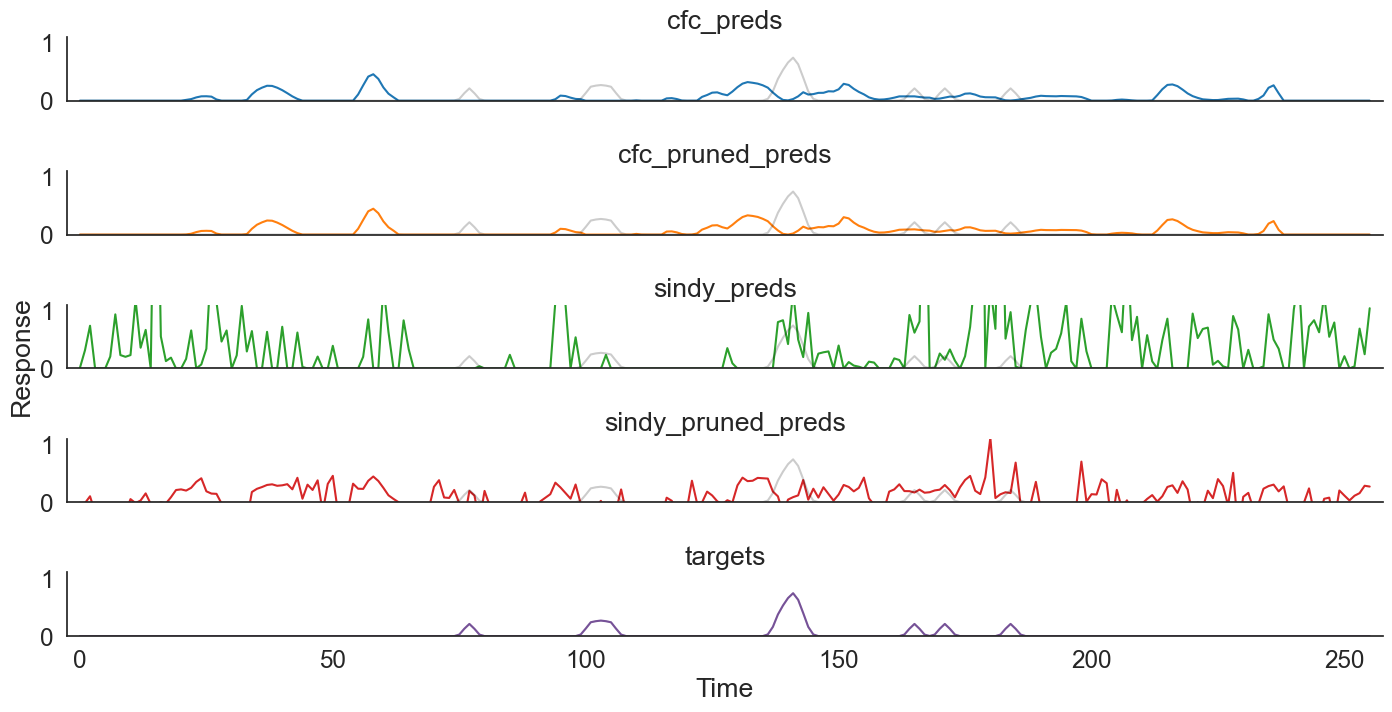

In [26]:
# Plot the predictions on separate subplots using seaborn

# Set the style
sns.set_context("paper")
# Set font_scale according to needs
sns.set(style="white", font_scale=1.6)

# Create a figure and axis
n_subplots = len(pred_dict)
fig, axes = plt.subplots(
    n_subplots,
    1,
    figsize=(
        14,
        1.5 * n_subplots,
    ),
    sharey=True,
)

# Select output channel
output_channel = "0"

# Iterate over the dictionary
for i, (model_name, df) in enumerate(pred_dict.items()):
    # Create a scatter plot
    x_axis_values = df[output_channel].index
    sns.lineplot(
        x=x_axis_values, y=output_channel, data=df, ax=axes[i], color=custom_colors[i]
    )
    # Plot the target values in background
    # Adjust data frame length
    target_df = pred_dict["targets"].iloc[: len(df)]
    sns.lineplot(
        x=target_df.index,
        y=output_channel,
        data=target_df,
        ax=axes[i],
        color="black",
        alpha=0.2,
    )
    # Add a title
    axes[i].set_title(model_name)
    axes[i].get_xaxis().set_visible(False)
    axes[i].set_ylabel("")
    axes[i].margins(x=0.01)
    axes[i].set_ylim(0, 1.1)

# Set x axis label for the last subplot
axes[-1].get_xaxis().set_visible(True)
axes[-1].set_xlabel("Time")

# Set y axis label for the figure
fig.text(-0.001, 0.5, "Response", va="center", rotation="vertical")

# Set fig title
# fig.suptitle(f"Predictions for output channel {output_channel}", fontsize=18)

sns.despine()
# Adjust the layout
plt.tight_layout()
plt.show()

fig.savefig(plot_dir / "predictions.png", bbox_inches="tight")

In [27]:
# Calculate mae for each model
mae_dict = {}
for model_name, df in pred_dict.items():
    if model_name == "targets":
        continue
    # Calculate the mean absolute error
    mae = np.mean(np.abs(df - pred_dict["targets"]))
    mae_dict[model_name] = mae

# Create a DataFrame from the mae_dict
mae_df = pd.DataFrame.from_dict(mae_dict, orient="index", columns=["MAE"])
# Sort the DataFrame by MAE
mae_df = mae_df.sort_values(by="MAE", ascending=True)

<Axes: >

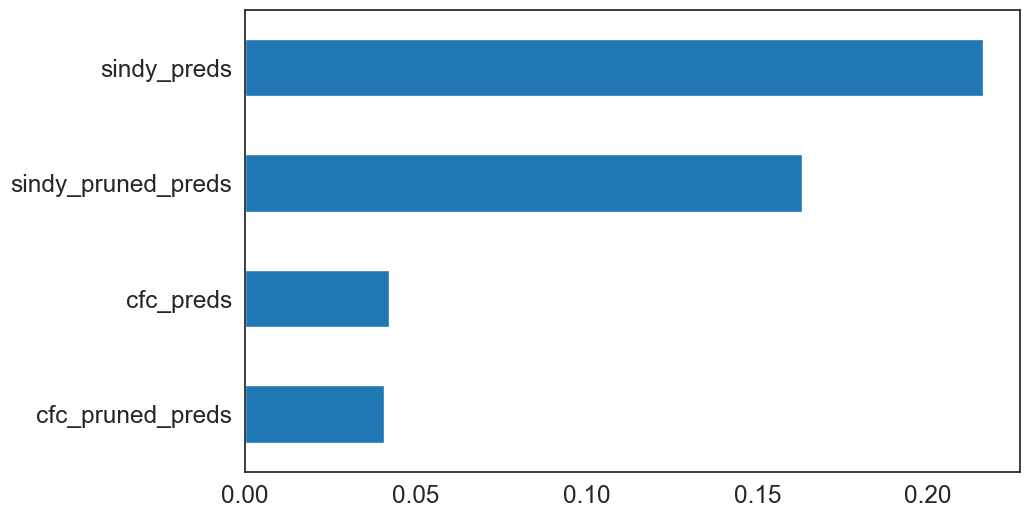

In [28]:
mae_df.plot(
    kind="barh",
    figsize=(10, 6),
    color=custom_colors[: len(mae_df)],
    legend=False,
)

TODO:

1. Prune the cfc weights
1. Simplify the equation
1. Parallelize sindy (Scipy) prediction